<h1> K Nearest Neighbours </h1>

## Table of Contents

1. [Autistic Spectrum Disorder Screening Data for Adult](#dd)
2. [Importing the packages and dataset](#import)
3. [Splitting the data into Training and Test Set](#split)
4. [Building the KNN model](#build)
5. [Predictions from KNN model](#predict)
6. [Evaluating the model](#eval)
7. [Appendix](#appendix)

### 1. Autistic Spectrum Disorder Screening Data for Adult Description  <a id='dd'>
Autistic Spectrum Disorder (ASD) is a neurodevelopment condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. Unfortunately, waiting times for an ASD diagnosis are lengthy and procedures are not cost effective. The economic impact of autism and the increase in the number of ASD cases across the world reveals an urgent need for the development of easily implemented and effective screening methods. 

Therefore, a time-efficient and accessible ASD screening is imminent to help health professionals and inform individuals whether they should pursue formal clinical diagnosis. The rapid growth in the number of ASD cases worldwide necessitates datasets related to behaviour traits.

However, such datasets are rare making it difficult to perform thorough analyses to improve the efficiency, sensitivity, specificity and predictive accuracy of the ASD screening process. Presently, very limited autism datasets associated with clinical or screening are available and most of them are genetic in nature. 

Hence, we propose a new dataset related to autism screening of adults that contained 20 features to be utilised for further analysis especially in determining influential autistic traits and improving the classification of ASD cases. In this dataset, we record ten behavioural features (AQ-10-Adult) plus ten individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science.

### Column Description  <a id='dd'>

A1_Score - A10_Score columns are questions whose answers are ('0', '1') <br>
age - number in years <br>
gender - female or male <br>
ethnicity - ('White-European', 'Latino', 'Others', 'Black', 'Asian', "'Middle Eastern '", 'Pasifika', "'South Asian'", <br> 'Hispanic', 'Turkish', 'others') <br>
jundice - ('no', 'yes') Whether the case was born with jaundice <br>
contry_of_res - Country of residence <br>
used_app_before - ('no', 'yes')  <br>
result - Result of the test  <br>
age_desc - Text description of age ("'18 and more'",) <br>
relation - Who is completing the test ('Self', 'Parent', "'Health care professional'", 'Relative', 'Others') <br>
Class/ASD - ('NO', 'YES') Whether the case has Autism Spectral Disorder  <br>
austim - ('no', 'yes')  Whether family member had autism <br>

### 2. Importing the packages and dataset  <a id='import'>

In [4]:
# Importing the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
import arff
# Loading the data
ASD_data_raw = arff.load(open(r"C:\Users\hp\Desktop\Path to Data Science\UpX\Machine Learning\KNN\Assignment\attachment_Autism-Adult-Data_lyst6665.arff"))

In [7]:
ASD_data_raw

{'description': '',
 'relation': 'adult-weka.filters.unsupervised.attribute.NumericToNominal-Rfirst-10',
 'attributes': [('A1_Score', ['0', '1']),
  ('A2_Score', ['0', '1']),
  ('A3_Score', ['0', '1']),
  ('A4_Score', ['0', '1']),
  ('A5_Score', ['0', '1']),
  ('A6_Score', ['0', '1']),
  ('A7_Score', ['0', '1']),
  ('A8_Score', ['0', '1']),
  ('A9_Score', ['0', '1']),
  ('A10_Score', ['0', '1']),
  ('age', 'NUMERIC'),
  ('gender', ['f', 'm']),
  ('ethnicity',
   ['White-European',
    'Latino',
    'Others',
    'Black',
    'Asian',
    'Middle Eastern ',
    'Pasifika',
    'South Asian',
    'Hispanic',
    'Turkish',
    'others']),
  ('jundice', ['no', 'yes']),
  ('austim', ['no', 'yes']),
  ('contry_of_res',
   ['United States',
    'Brazil',
    'Spain',
    'Egypt',
    'New Zealand',
    'Bahamas',
    'Burundi',
    'Austria',
    'Argentina',
    'Jordan',
    'Ireland',
    'United Arab Emirates',
    'Afghanistan',
    'Lebanon',
    'United Kingdom',
    'South Africa',
 

In [52]:
len(ASD_data_raw['attributes'])

21

In [53]:
col_names=[]
for item in range(len(ASD_data_raw['attributes'])):
    col, val = ASD_data_raw['attributes'][item]
    col_names.append(col)
    
col_names

['A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score',
 'age',
 'gender',
 'ethnicity',
 'jundice',
 'austim',
 'contry_of_res',
 'used_app_before',
 'result',
 'age_desc',
 'relation',
 'Class/ASD']

In [54]:
# Selection of the Data and converting data into numpy format for flexibility in cleaning
ASD = np.array(ASD_data_raw['data'])

In [55]:
ASD

array([['1', '1', '1', ..., '18 and more', 'Self', 'NO'],
       ['1', '1', '0', ..., '18 and more', 'Self', 'NO'],
       ['1', '1', '0', ..., '18 and more', 'Parent', 'YES'],
       ...,
       ['1', '0', '1', ..., '18 and more', None, 'YES'],
       ['1', '0', '0', ..., '18 and more', 'Self', 'NO'],
       ['1', '0', '1', ..., '18 and more', 'Self', 'YES']], dtype=object)

In [56]:
# Converting the numpy array into Pandas data frame  
ASD_df = pd.DataFrame(ASD, columns=col_names)
ASD_df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,None,no,no,Egypt,no,2,18 and more,None,NO
5,1,1,1,1,1,0,1,1,1,1,...,m,Others,yes,no,United States,no,9,18 and more,Self,YES
6,0,1,0,0,0,0,0,1,0,0,...,f,Black,no,no,United States,no,2,18 and more,Self,NO
7,1,1,1,1,0,0,0,0,1,0,...,m,White-European,no,no,New Zealand,no,5,18 and more,Parent,NO
8,1,1,0,0,1,0,0,1,1,1,...,m,White-European,no,no,United States,no,6,18 and more,Self,NO
9,1,1,1,1,0,1,1,1,1,0,...,m,Asian,yes,yes,Bahamas,no,8,18 and more,Health care professional,YES


In [57]:
ASD_df_num = ASD_df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score','age','result']].apply(pd.to_numeric)
ASD_df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 12 columns):
A1_Score     704 non-null int64
A2_Score     704 non-null int64
A3_Score     704 non-null int64
A4_Score     704 non-null int64
A5_Score     704 non-null int64
A6_Score     704 non-null int64
A7_Score     704 non-null int64
A8_Score     704 non-null int64
A9_Score     704 non-null int64
A10_Score    704 non-null int64
age          702 non-null float64
result       704 non-null float64
dtypes: float64(2), int64(10)
memory usage: 66.1 KB


**Cleaning the categorical values**

In [58]:
df_gender = pd.get_dummies(ASD_df['gender'], drop_first = True)
df_gender.head()

,m
0,0
1,1
2,1
3,0
4,0


In [59]:
ASD_df.jundice.replace({'yes':1,'no':0},inplace=True)
ASD_df.used_app_before.replace({'yes':1,'no':0},inplace=True)
ASD_df.austim.replace({'yes':1,'no':0},inplace=True)

In [63]:
df_bools = ASD_df[['jundice','used_app_before','austim']]

In [64]:
df_bools_num = df_bools.astype(int)
df_bools_num.head()

,jundice,used_app_before,austim
0,0,0,0
1,0,0,1
2,1,0,1
3,0,0,1
4,0,0,0


In [66]:
df_asd = ASD_df[['Class/ASD']] == 'YES'
df_asd_num = df_asd.astype(int)
df_asd_num.head()

,Class/ASD
0,0
1,0
2,1
3,0
4,0


In [68]:
ASD_df['ethnicity'].value_counts()

White-European     233
Asian              123
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
others               1
Name: ethnicity, dtype: int64

In [69]:
ASD_df[ASD_df['ethnicity'] == 'others']

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
657,1,1,0,0,1,0,1,0,1,0,...,m,others,0,0,United States,0,5,18 and more,Self,NO


In [71]:
# Dropping the outlier 'others'

ASD_df.drop(ASD_df.index[657], inplace = True)

In [73]:
#Number of null values in ethnicity

ASD_df['ethnicity'].isnull().sum()

95

In [75]:
#Country of residence for people having null ethnicity

ASD_df[ASD_df['ethnicity'].isnull()]['contry_of_res'].value_counts()

Jordan                  42
United Arab Emirates    15
Iran                     5
Russia                   5
New Zealand              5
Afghanistan              3
Kazakhstan               3
Argentina                2
Saudi Arabia             2
Hong Kong                1
Pakistan                 1
Bahamas                  1
Azerbaijan               1
Egypt                    1
United Kingdom           1
Lebanon                  1
Iraq                     1
Brazil                   1
Austria                  1
Japan                    1
Ukraine                  1
United States            1
Name: contry_of_res, dtype: int64

In [76]:
#Checking ethnicity of people from Jordan

ASD_df[ASD_df['contry_of_res'] == 'Jordan']['ethnicity'].value_counts()

Middle Eastern     5
Name: ethnicity, dtype: int64

In [77]:
#Since all the people are Middle Eastern, we can fill all Jordan ethnicity with Middle Eastern

ASD_df.loc[ASD_df['contry_of_res'] == 'Jordan', 'ethnicity'] = 'Middle Eastern '

In [78]:
#Checking ethnicity of people from United Arab Emirates

ASD_df[ASD_df['contry_of_res'] == 'United Arab Emirates']['ethnicity'].value_counts()

Middle Eastern     53
Black               5
Others              3
Turkish             2
Asian               2
South Asian         1
Pasifika            1
Name: ethnicity, dtype: int64

In [79]:
#Since most of people are Middle Eastern, we can fill all UAE ethnicity with Middle Eastern

ASD_df.loc[ASD_df['contry_of_res'] == 'United Arab Emirates', 'ethnicity'] = 'Middle Eastern '

In [80]:
#Lets fill the ethnicity of rest of the people with Others

ASD_df['ethnicity'].fillna('Others', inplace=True)

In [81]:
df_ethnicity = pd.get_dummies(ASD_df['ethnicity'], drop_first=True)
df_ethnicity.head()

,Black,Hispanic,Latino,Middle Eastern,Others,Pasifika,South Asian,Turkish,White-European
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0


In [82]:
df_allfeatures = pd.concat([ASD_data_num, df_gender, df_bools_num, df_asd_num, df_ethnicity], axis=1)

In [83]:
df_allfeatures.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'm',
       'jundice', 'used_app_before', 'austim', 'Class/ASD', 'Black',
       'Hispanic', 'Latino', 'Middle Eastern ', 'Others', 'Pasifika',
       'South Asian', 'Turkish', 'White-European'],
      dtype='object')

In [84]:
df_allfeatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 0 to 703
Data columns (total 26 columns):
A1_Score           704 non-null int64
A2_Score           704 non-null int64
A3_Score           704 non-null int64
A4_Score           704 non-null int64
A5_Score           704 non-null int64
A6_Score           704 non-null int64
A7_Score           704 non-null int64
A8_Score           704 non-null int64
A9_Score           704 non-null int64
A10_Score          704 non-null int64
age                702 non-null float64
result             704 non-null float64
m                  704 non-null uint8
jundice            704 non-null int32
used_app_before    704 non-null int32
austim             704 non-null int32
Class/ASD          704 non-null int32
Black              703 non-null float64
Hispanic           703 non-null float64
Latino             703 non-null float64
Middle Eastern     703 non-null float64
Others             703 non-null float64
Pasifika           703 non-null float64
South

In [86]:
# Age and Result are the only Numeric data in our dataframe. Rest all are 0 and 1.

df_allfeatures[['age','result']].describe()

,age,result
count,702.000000,704.000000
mean,29.698006,4.875000
std,16.507465,2.501493
min,17.000000,0.000000
25%,21.000000,3.000000
50%,27.000000,4.000000
75%,35.000000,7.000000
max,383.000000,10.000000


Age of a person cannot be 383. Lets remove that row.

In [87]:
#Checking the entry with age=383
df_allfeatures[df_allfeatures.age == 383]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Class/ASD,Black,Hispanic,Latino,Middle Eastern,Others,Pasifika,South Asian,Turkish,White-European
52,1,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [88]:
#Dropping that entry
df_allfeatures.drop(df_allfeatures.index[52], inplace=True)

In [89]:
df_allfeatures.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'm',
       'jundice', 'used_app_before', 'austim', 'Class/ASD', 'Black',
       'Hispanic', 'Latino', 'Middle Eastern ', 'Others', 'Pasifika',
       'South Asian', 'Turkish', 'White-European'],
      dtype='object')

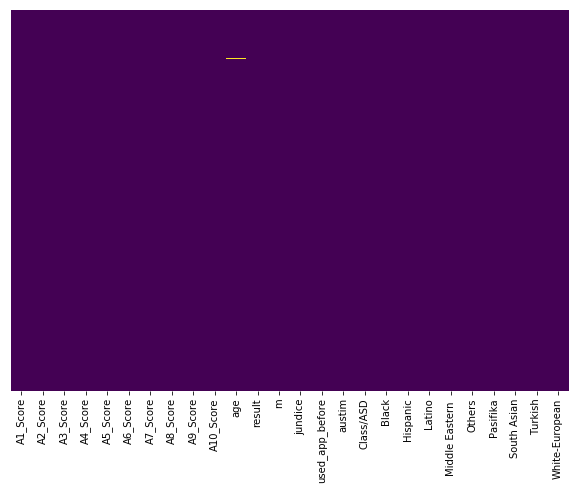

In [90]:
#Checking for issing values
plt.figure(figsize=(10,7))
sns.heatmap(df_allfeatures.isnull(),cmap="viridis",cbar=False,yticklabels=False)

There's single missing value in Age. Lets drop that row.

In [91]:
df_allfeatures.dropna(inplace=True)

In [92]:
# In this dataframe autism should not be confused with 'Class/ASD'.
# 'autism' column is to see if family member suffered autism. So we will rename this column as 'fam_autism
# 'Class/ASD' is our label.

df_allfeatures.rename(columns = {'austim':'fam_autism'}, inplace=True)
df_allfeatures.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'm',
       'jundice', 'used_app_before', 'fam_autism', 'Class/ASD', 'Black',
       'Hispanic', 'Latino', 'Middle Eastern ', 'Others', 'Pasifika',
       'South Asian', 'Turkish', 'White-European'],
      dtype='object')

**EDA**

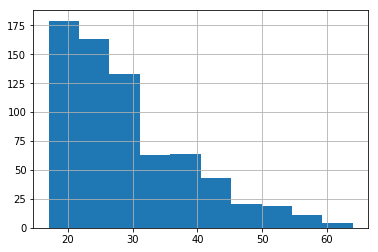

In [94]:
df_allfeatures['age'].hist(bins=10);

Most of the cases of Autism are observed at young age.

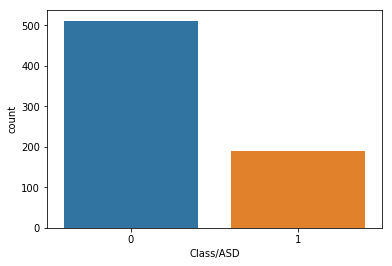

In [95]:
#Let's check the count of cases of austism
sns.countplot(x='Class/ASD',data=df_allfeatures)

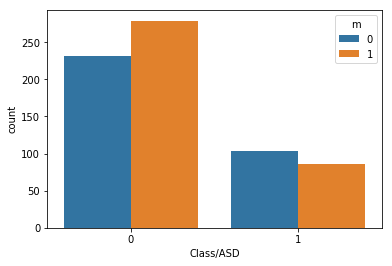

In [96]:
#Let's check the cases wrt gender 'male'
sns.countplot(x='Class/ASD',hue="m",data=df_allfeatures)

Here 1 is for males and 0 for females

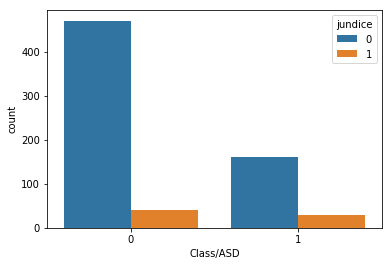

In [97]:
sns.countplot(x='Class/ASD',hue="jundice",data=df_allfeatures)

We can see that in case of Class = 1, presence of jundice is very less

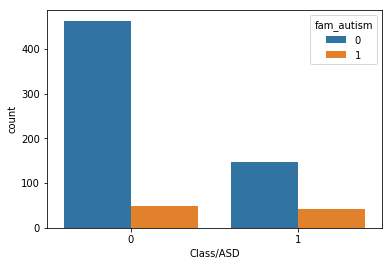

In [98]:
sns.countplot(x='Class/ASD',hue="fam_autism",data=df_allfeatures)

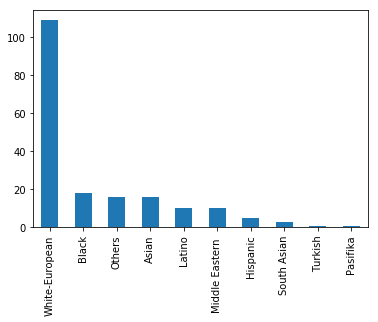

In [100]:
ASD_df[ASD_df['Class/ASD'] == 'YES']['ethnicity'].value_counts().plot(kind='bar')

Maximum cases of autism are from White-European ethnicity. <br>
This can be biased as there are more observation from this ethnicity.

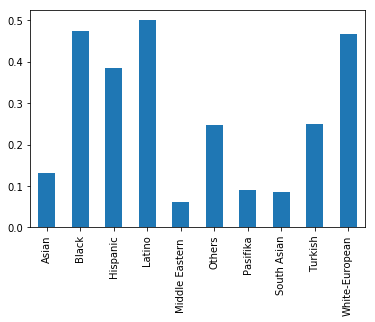

In [102]:
positive = ASD_df[ASD_df['Class/ASD'] == 'YES']['ethnicity'].value_counts()
total = ASD_df['ethnicity'].value_counts()
ratio = positive/total
ratio.plot(kind = 'bar')

This plot shows that Latino, Black and White-Europeans have highest cases of Autism.

### 3. Splitting the data into Training and Test Set   <a id='split'>

In [104]:
# Labels
y = df_allfeatures['Class/ASD']
X = df_allfeatures.drop('Class/ASD', axis=1)

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### 4.Building the KNN model    <a id='predict'>
    

In [105]:
# Fitting the KNN Classifier on Training data
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=10)
clf_knn = clf_knn.fit(X_train,y_train)

### 5. Prediction from KNN model    <a id='predict'>

In [106]:
y_pred = clf_knn.predict(X_test)

### 6. Evaluating the model   <a id='eval'>

**Cross Validation** is used to see how well a model performs in an independent dataset. Different samples are used for training and testing and the average accuracy score is calculated.

In [107]:
# Computing the Cross validation score with 5-fold cross validation

from sklearn.model_selection import cross_val_score
score_knn = cross_val_score(clf_knn, X_test, y_test, cv=5)
print("Cross Validation score : " + str(score_knn))
print("Cross Validation Mean score : " + str(score_knn.mean()))

Cross Validation score : [0.97619048 0.97619048 0.9047619  1.         0.92857143]
Cross Validation Mean score : 0.9571428571428571


**Classification Report**

In [108]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       155
           1       0.96      0.96      0.96        55

   micro avg       0.98      0.98      0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



**Confusion Matrix**

In [112]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[153,   2],
       [  2,  53]], dtype=int64)

**Accuracy**

In [113]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9809523809523809

### 7. Appendix   <a id='appendix'>
1. Use different counts of neighbours by setting value of k (5,7,9,11,13,15,17) <br/>
2. Perform CV(5) on each value of <b>k (k in kNN)</b> <br/>
3. Compare the <b>CV Score</b> to deduce the best model <br/>
4. Use the best value of k <br/>

In [114]:
list_k = [5,7,9,11,13,15,17]

for k in list_k:
    clf_knn = KNeighborsClassifier(n_neighbors=k)
    score_knn = cross_val_score(clf_knn, X_test, y_test, cv=5)
    print("K: ", k)
    print("Cross Validation score : " + str(score_knn))
    print("Cross Validation Mean score : " + str(score_knn.mean()))
    print("")

K:  5
Cross Validation score : [0.97619048 1.         0.92857143 0.97619048 0.95238095]
Cross Validation Mean score : 0.9666666666666668

K:  7
Cross Validation score : [0.97619048 0.97619048 0.92857143 0.97619048 0.95238095]
Cross Validation Mean score : 0.9619047619047618

K:  9
Cross Validation score : [1.         0.97619048 0.92857143 1.         0.95238095]
Cross Validation Mean score : 0.9714285714285715

K:  11
Cross Validation score : [0.97619048 0.95238095 0.9047619  1.         0.95238095]
Cross Validation Mean score : 0.9571428571428571

K:  13
Cross Validation score : [0.97619048 0.95238095 0.9047619  1.         0.95238095]
Cross Validation Mean score : 0.9571428571428571

K:  15
Cross Validation score : [0.95238095 0.97619048 0.9047619  1.         0.92857143]
Cross Validation Mean score : 0.9523809523809523

K:  17
Cross Validation score : [0.97619048 0.95238095 0.9047619  1.         0.92857143]
Cross Validation Mean score : 0.9523809523809523



Using the value of k=5, we have obtained the highest cross-validation accuracy of 0.952

**The End**